In [1]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

Consider an exponential likelihood, $Y|\theta\sim\textsf{Exponential}(\theta)$, that is $p(Y|\theta)=\theta e^{-\theta Y}$.

We calculate the score function as

\begin{align}
sc(\theta) &= \frac{d}{d\theta}\log p(Y|\theta) \\\\
&= \frac{1}{\theta}-Y 
\end{align}
To get an insight on the meaning of the score function, we simulate $n$ observations from an exponential distribution, and plot the score function for each one of the simulated observations.

Note that the score function is a function of $\theta$, that depends also on the value of $Y$.

On the other hand, we calculated the expected value of the score function to be

$$\mathbb{E}_{Y\sim p(Y|\theta_0)}[sc(\theta)]=\frac{1}{\theta}-\frac{1}{\theta_0}.$$

Note that this is another function of $\theta$, which takes the value of zero when $\theta=\theta_0$.

In real applications, we do not have access to $\mathbb{E}_{Y\sim p(Y|\theta_0)}[sc(\theta)]$, because we do not know the value of $\theta_0$, but we can estimate it using the average of our score functions.

In [2]:
def score(t, y):
    return 1/t - y

In [3]:
THETA0 = 4
N = 10

Y = expon.rvs(size=N, scale=1/THETA0)

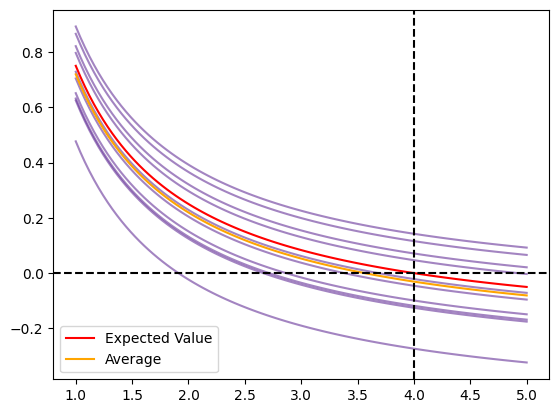

In [4]:
t_vect = np.linspace(1,5,100)

for y in Y:
    plt.plot(t_vect, [score(t, y) for t in t_vect], alpha=0.6, color='rebeccapurple')

plt.plot(t_vect, [score(t, 1/THETA0) for t in t_vect], color='red', label='Expected Value')
plt.plot(t_vect, [score(t, np.mean(Y)) for t in t_vect], color='orange', label='Average')

plt.legend()
plt.axvline(4, color='k', linestyle='--')
plt.axhline(0, color='k', linestyle='--')

We define the empirical score function for a sample $Y_1,\ldots,Y_n$ of i.i.d. r.v. as

$$sc_n(\theta)=\frac{d}{d\theta}\log p(\vec{Y}|\theta)$$

In such case, we can estimate $\mathbb{E}_{Y\sim p(Y|\theta_0)}[sc(\theta)]$ with $\frac{1}{n}sc_n(\theta)$

In [5]:
def score_n(t, y_vect):
    n = len(y_vect)
    return n/t - n*np.mean(y_vect)

In the next cells we simulate ``SAMPLES`` of size ``N`` each one, and plot $\frac{1}{n}sc_n(\theta)$ for each sample.

Note that when we increase the size of the samples, the values of $\theta$ where they cross the horizontal line in zero get closer to $\theta_0$. And how $\frac{1}{n}sc_n(\theta)$ gets closer to $\mathbb{E}_{Y\sim p(Y|\theta_0)}[sc(\theta)]$.

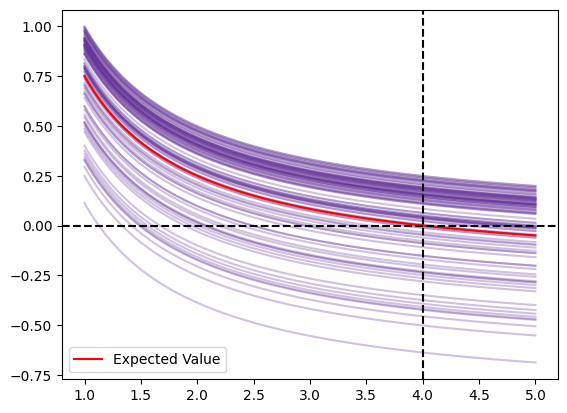

In [6]:
THETA0 = 4
N = 1
SAMPLES = 100

t_vect = np.linspace(1,5,100)

for _ in range(SAMPLES):
    Y = expon.rvs(size=N, scale=1/THETA0)
    plt.plot(t_vect, [1/N * score_n(t, Y) for t in t_vect], alpha=0.3, color='rebeccapurple')

plt.plot(t_vect, [score(t, 1/THETA0) for t in t_vect], color='red', label='Expected Value')

plt.legend()
plt.axvline(4, color='k', linestyle='--')
plt.axhline(0, color='k', linestyle='--')

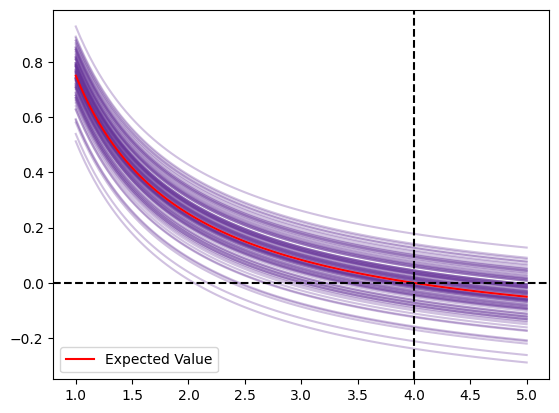

In [9]:
THETA0 = 4
N = 10
SAMPLES = 100

t_vect = np.linspace(1,5,100)

for _ in range(SAMPLES):
    Y = expon.rvs(size=N, scale=1/THETA0)
    plt.plot(t_vect, [1/N * score_n(t, Y) for t in t_vect], alpha=0.3, color='rebeccapurple')

plt.plot(t_vect, [score(t, 1/THETA0) for t in t_vect], color='red', label='Expected Value')

plt.legend()
plt.axvline(4, color='k', linestyle='--')
plt.axhline(0, color='k', linestyle='--')

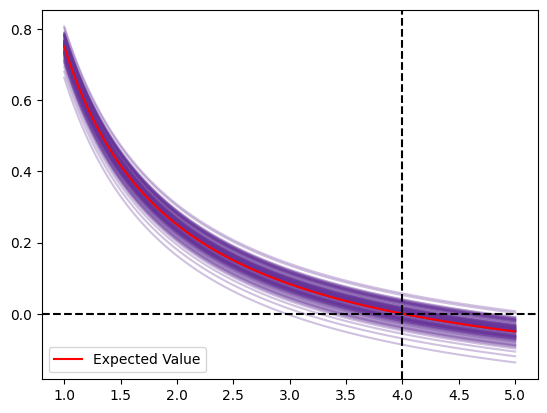

In [7]:
THETA0 = 4
N = 100
SAMPLES = 100

t_vect = np.linspace(1,5,100)

for _ in range(SAMPLES):
    Y = expon.rvs(size=N, scale=1/THETA0)
    plt.plot(t_vect, [1/N * score_n(t, Y) for t in t_vect], alpha=0.3, color='rebeccapurple')

plt.plot(t_vect, [score(t, 1/THETA0) for t in t_vect], color='red', label='Expected Value')

plt.legend()
plt.axvline(4, color='k', linestyle='--')
plt.axhline(0, color='k', linestyle='--')

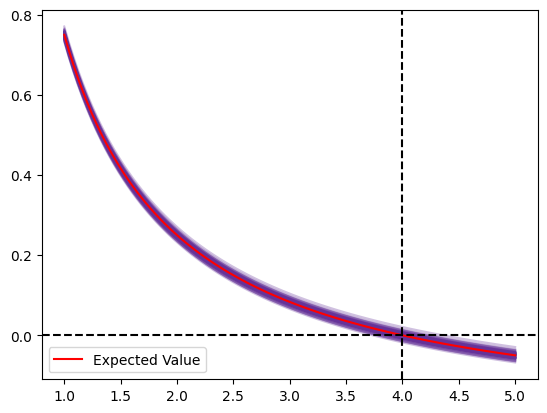

In [8]:
THETA0 = 4
N = 1000
SAMPLES = 100

t_vect = np.linspace(1,5,100)

for _ in range(SAMPLES):
    Y = expon.rvs(size=N, scale=1/THETA0)
    plt.plot(t_vect, [1/N * score_n(t, Y) for t in t_vect], alpha=0.3, color='rebeccapurple')

plt.plot(t_vect, [score(t, 1/THETA0) for t in t_vect], color='red', label='Expected Value')

plt.legend()
plt.axvline(4, color='k', linestyle='--')
plt.axhline(0, color='k', linestyle='--')

We define the expected Fisher information as

$$\mathcal{I}_{\theta_0}(\theta) = \mathbb{E}_{Y\sim p(Y|\theta_0)}[sc^2(\theta)].$$

For the exponential distribution, this is

$$\mathcal{I}_{\theta_0}(\theta)=\frac{1}{\theta^2}-\frac{2}{\theta\theta_0}+\frac{2}{\theta_0^2}.$$

A central quantity on the theory of statistical inference is the expected Fisher information evaluated in $\theta_0$: $$J(\theta_0)=\mathcal{I}_{\theta_0}(\theta_0).$$

In our case, $$J(\theta_0)=\frac{1}{\theta_0}.$$

Furthermore, it can be proved that, under regularity conditions:

$$J(\theta)=-\mathbb{E}_{Y\sim p(Y|\theta)}\left[\frac{d^2}{d\theta^2}\log p(Y|\theta)\right]$$

In [10]:
def I(t):
    return 1/t**2 - 2/(t*THETA0) + 2/THETA0**2

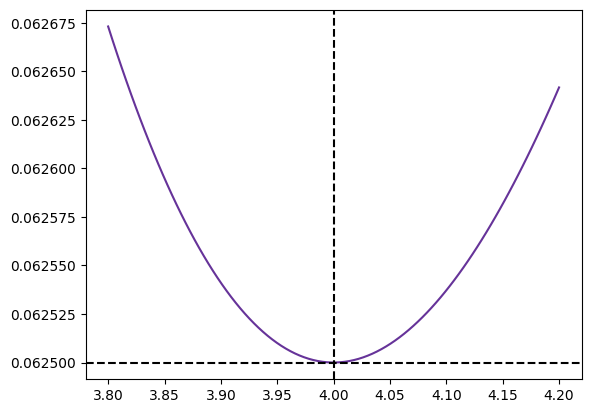

In [11]:
t_vect = np.linspace(3.8, 4.2, 100)

plt.plot(t_vect, [I(t) for t in t_vect], color='rebeccapurple')

plt.axvline(4, color='k', linestyle='--')
plt.axhline(1/THETA0**2, color='k', linestyle='--')